In [31]:
import pandas as pd
from nilearn.glm.second_level import non_parametric_inference
from nilearn.reporting import get_clusters_table
from decouple import config
from nilearn import plotting
import numpy as np
import os
import nilearn.image as img
import nibabel.n

In [2]:
path = config('happy')
files = pd.read_csv(f"{path}/1stlevel_location.csv")
files = files.drop(files[files['t1'] == 75].index)

In [40]:
print(type(concat_img))

<class 'nibabel.nifti1.Nifti1Image'>


In [16]:
subject_mean_images = {
    'HC' : [],
    'AN' : []
}

for subject in range(0, files.shape[0]):
    try:
        t1_image = img.load_img(files['t1'].iloc[subject])
        t2_image = img.load_img(files['t1'].iloc[subject])
        concat_img = img.mean_img([t1_image, t2_image])
        #mean_img = img.mean_img('np.mean(img)', img=concat_img)
    except Exception as e:
        print(e)
        continue

    if 'G1' in files['t1'].iloc[subject]:
        subject_mean_images['HC'].append(concat_img)
    else:
        subject_mean_images['AN'].append(concat_img)

File not found: '/data/project/BEACONB/task_fmri/happy/1stlevel/T1/sub-G2127/con_0001.nii'


In [18]:
subject_mean_images['HC'][0].shape

(97, 115, 97)

In [4]:
design_matrix = pd.DataFrame(data={'Group': np.hstack((-np.ones(len(subject_mean_images['HC'])), np.ones(len(subject_mean_images['AN']))))})

In [45]:
for key in group_diff.keys():
    print(key)

t
logp_max_t
tfce
logp_max_tfce


In [33]:
subjects_to_analyse = subject_mean_images['HC'] + subject_mean_images['AN']
mask_2ndlevel = img.load_img(os.path.join(path, '2ndlevel', 'mixed_model', 'mask_img.nii.gz' ))

In [37]:
group_diff = non_parametric_inference(
    second_level_input=subjects_to_analyse,
    design_matrix=design_matrix,
    second_level_contrast="Group",
    mask=mask_2ndlevel,
    model_intercept=True,
    n_perm=100,
    n_jobs=4,
    tfce=True,
    verbose=3

)

Fitting second level model...
Computation of second level model done in 0 seconds


[NiftiMasker.fit] Loading data from Nifti1Image(
shape=(97, 115, 97),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 92),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Job #1, processed 0/25 permutations (0.00%, 85846.17137908936 seconds remaining)
Job #3, processed 0/25 permutations (0.00%, 82797.21736907959 seconds remaining)
Job #2, processed 0/25 permutations (0.00%, 88244.95315551758 seconds remaining)
Job #4, processed 0/25 permutations (0.00%, 90796.26321792603 seconds remaining)
Job #4, processed 9/25 permutations (36.00%, 135.43143632676865 seconds remaining)
Job #3, processed 9/25 permutations (36.00%, 153.2118937174479 seconds remaining)
Job #1, processed 9/25 permutations (36.00%, 154.38862567477756 seconds remaining)
Job #2, processed 9/25 permutations (36.00%, 154.44734870062933 seconds remaining)
Job #4, processed 18/25 permutations (72.00%, 55.699483089976844 seconds remaining)
Job #3, processed 18/25 permutations (72.00%, 63.57497913307614 seconds remaining)
Job #2, processed 18/25 permutations (72.00%, 64.14303814040291 seconds remaining)
Job #1, processed 18

In [39]:
group_diff['logp_max_tfce'].to_filename('mixed_model_tfce_tstat_fwep_group.nii.gz')

In [ ]:
img.

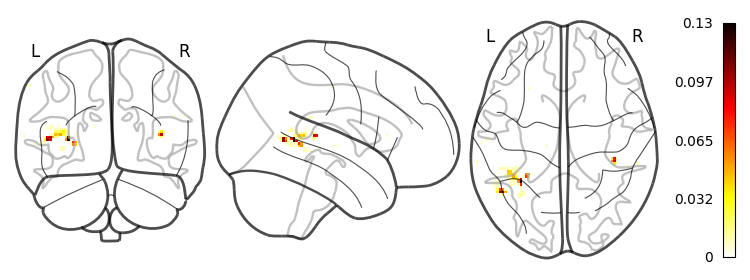

In [38]:
plotting.plot_glass_brain(group_diff['logp_max_tfce'], colorbar=True, plot_abs=False)

In [29]:
pval_table = get_clusters_table(group_diff['logp_max_tfce'], stat_threshold=0.0,
                           cluster_threshold=00.0).set_index('Cluster ID', drop=True)
pval_table['Pval'] = 10 ** -pval_table['Peak Stat'].values
pval_table = pval_table.rename(columns={'Peak Stat':'-log10P'})

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:103: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Identifying the nearest in-cluster voxel.
  warnings.warn(
